In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def readcfl(name):
    # get dims from .hdr
    h = open(name + ".hdr", "r")
    h.readline() # skip
    l = h.readline()
    h.close()
    dims = [int(i) for i in l.split( )]

    # remove singleton dimensions from the end
    n = np.prod(dims)
    dims_prod = np.cumprod(dims)
    dims = dims[:np.searchsorted(dims_prod, n)+1]

    # load data and reshape into dims
    d = open(name + ".cfl", "r")
    a = np.fromfile(d, dtype=np.complex64, count=n);
    d.close()
    return a.reshape(dims, order='F') # column-major

def writecfl(name, array):
    h = open(name + ".hdr", "w")
    h.write('# Dimensions\n')
    for i in (array.shape):
            h.write("%d " % i)
    h.write('\n')
    h.close()
    d = open(name + ".cfl", "w")
    array.T.astype(np.complex64).tofile(d) # tranpose for column-major order
    d.close()

In [59]:
# Input files
f_base = "/home/gogol/BI201/2019-11-25/20191125_vo"
f_traj = f_base + "_traj"
f_data = f_base + "_data"
f_dcf = f_base + "_dcf"
f_resp = f_base + "_resp"

# Output files
f_out_base = f_base + "_ds"
f_traj_out = f_out_base + "_traj"
f_data_out = f_out_base + "_data"
f_dcf_out = f_out_base + "_dcf"
f_resp_out = f_out_base + "_resp"

# Load Original Respiratory data

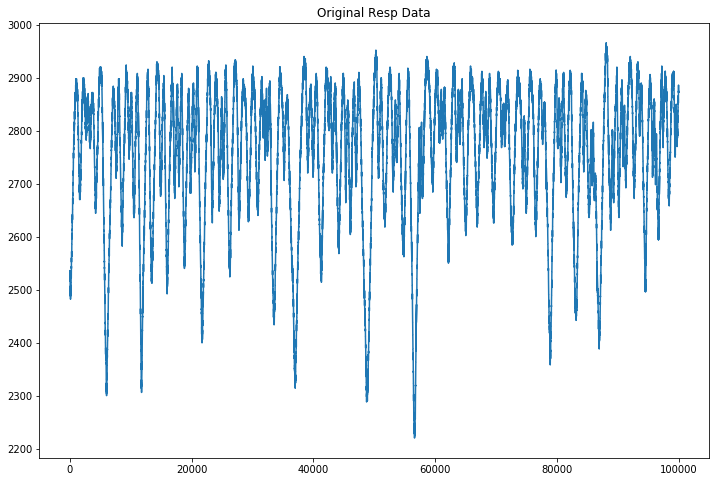

In [60]:
resp_data = np.abs(readcfl(f_resp))
plt.figure(figsize=(12,8))
plt.plot(resp_data);
plt.title("Original Resp Data");

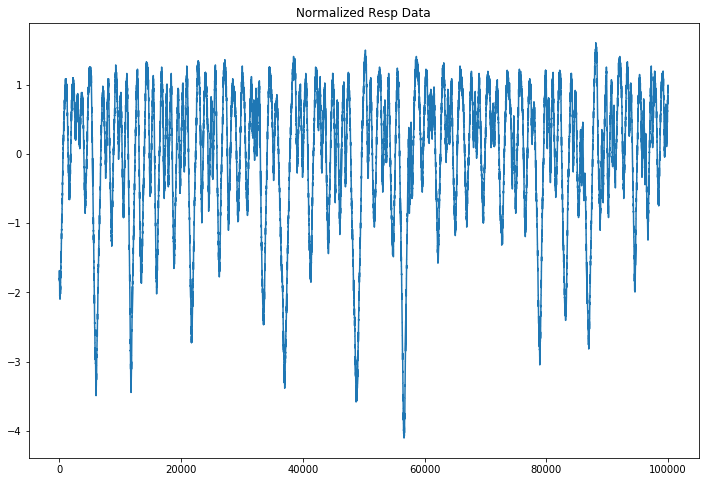

In [61]:
resp_data_norm = (resp_data - np.mean(resp_data))/np.std(resp_data)
plt.figure(figsize=(12,8))
plt.plot(resp_data_norm);
plt.title("Normalized Resp Data");

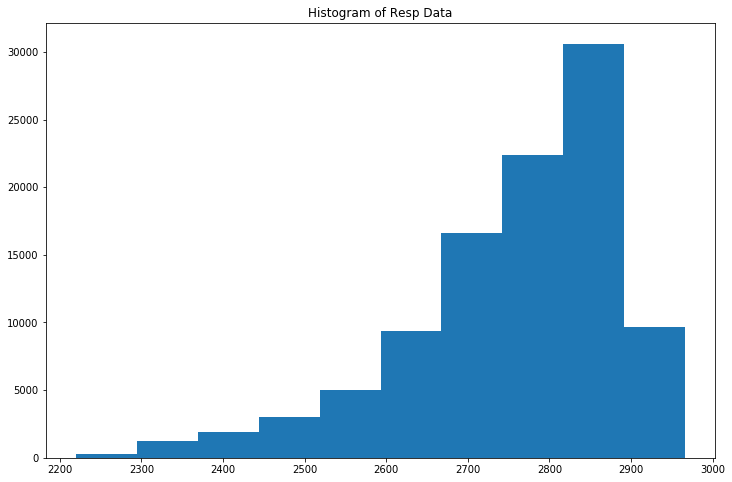

In [62]:
numBins= 10
counts, bins = np.histogram(resp_data,bins=numBins)
plt.figure(figsize=(12,8))
plt.hist(bins[:-1], bins, weights=counts)
plt.title("Histogram of Resp Data");

In [63]:
bins[np.argmax(counts)]

2816.8

In [64]:
bins[np.argmax(counts) + 1]

2891.4

In [65]:
np.median(resp_data)

2788.0

# Create Downsampling pattern

In [66]:
resp_data = np.abs(readcfl(f_resp))
respmin = np.median(resp_data)
respmax = np.max(resp_data)
print("Min: {0} | Max: {1}".format(respmin, respmax))

Min: 2788.0 | Max: 2966.0


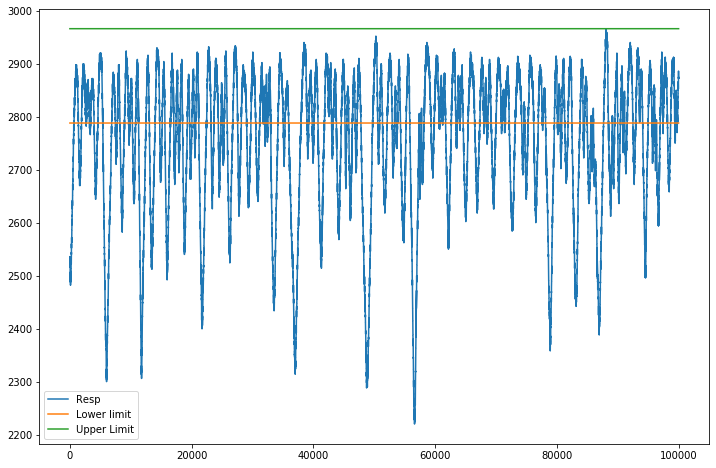

In [67]:
lower_thresh = np.full(resp_data.shape,respmin)
upper_thresh = np.full(resp_data.shape,respmax)

plt.figure(figsize=(12,8))
plt.plot(resp_data);
plt.plot(lower_thresh);
plt.plot(upper_thresh);
plt.legend(["Resp","Lower limit","Upper Limit"]);

In [68]:
selection_array = (resp_data >= respmin) & (resp_data <= respmax)

In [69]:
ds_resp = resp_data[selection_array]

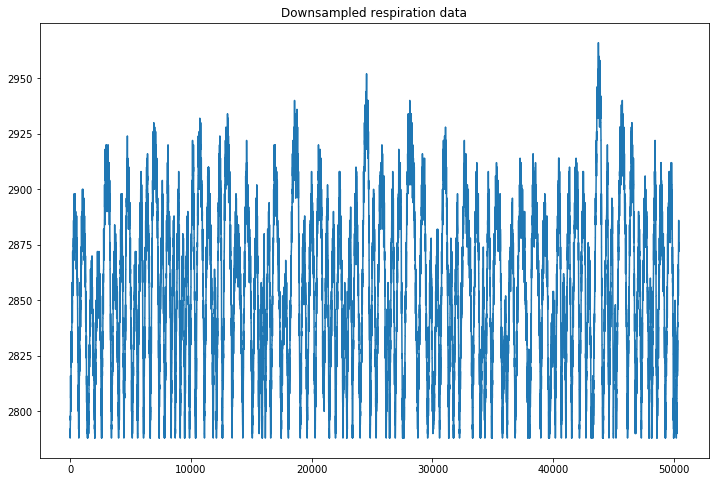

In [70]:
plt.figure(figsize=(12,8))
plt.plot(ds_resp)
plt.title('Downsampled respiration data');

# Downsample the data

In [71]:
traj_data = readcfl(f_traj)
data_data = readcfl(f_data)
dcf_data = readcfl(f_dcf)

In [72]:
traj_data.shape

(3, 512, 100015)

In [73]:
traj_data_ds = traj_data[:,:,selection_array]

In [74]:
traj_data_ds = np.expand_dims(traj_data_ds,axis=4)
traj_data_ds = np.expand_dims(traj_data_ds,axis=4)
traj_data_ds.shape

/home/gogol/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  """Entry point for launching an IPython kernel.


(3, 512, 50407, 1, 1)

In [75]:
dcf_data.shape

(1, 512, 100015)

In [76]:
dcf_data_ds = dcf_data[:,:,selection_array]

In [77]:
dcf_data_ds = np.expand_dims(dcf_data_ds,axis=4)
dcf_data_ds = np.expand_dims(dcf_data_ds,axis=4)
dcf_data_ds.shape

/home/gogol/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  """Entry point for launching an IPython kernel.


(1, 512, 50407, 1, 1)

In [78]:
data_data.shape

(1, 512, 100015, 8)

In [79]:
data_data_ds = data_data[:,:,selection_array,:]

In [80]:
data_data_ds = np.expand_dims(data_data_ds,axis=5)
data_data_ds.shape

/home/gogol/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  """Entry point for launching an IPython kernel.


(1, 512, 50407, 8, 1)

In [81]:
resp_data.shape

(100015,)

In [82]:
resp_data_ds = resp_data[selection_array]

In [83]:
resp_data_ds = np.expand_dims(resp_data_ds,axis=2)
resp_data_ds = np.expand_dims(resp_data_ds,axis=2)
resp_data_ds = np.expand_dims(resp_data_ds,axis=2)
resp_data_ds = np.expand_dims(resp_data_ds,axis=2)
resp_data_ds.shape

/home/gogol/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  """Entry point for launching an IPython kernel.


(50407, 1, 1, 1, 1)

In [84]:
writecfl(f_data_out,data_data_ds)
writecfl(f_traj_out,traj_data_ds)
writecfl(f_dcf_out,dcf_data_ds)
writecfl(f_resp_out,resp_data_ds)

(array([  302.,  1205.,  1924.,  3036.,  4994.,  9337., 16581., 22355.,
        30611.,  9670.]),
 array([-4.105275  , -3.534268  , -2.9632607 , -2.3922534 , -1.8212461 ,
        -1.2502389 , -0.67923164, -0.10822439,  0.46278286,  1.0337901 ,
         1.6047974 ], dtype=float32),
 <a list of 10 Patch objects>)

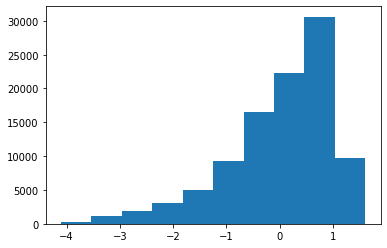

In [132]:
plt.hist(resp_data_norm)